In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()  # Menampilkan 5 baris pertama

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
# Hilangkan spasi di awal/akhir semua nama kolom
df.columns = df.columns.str.strip()

In [ ]:
df = df.dropna(subset=['Life expectancy'])

In [ ]:
# Bersihkan nama kolom dari spasi tersembunyi
df.columns = df.columns.str.strip()

# Hapus baris yang tidak punya nilai target
df = df.dropna(subset=['Life expectancy'])

# Kolom yang akan diisi median (missing < 10%)
columns_fill_median = [
    'Alcohol', 'Total expenditure', 'BMI',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Polio', 'Diphtheria', 'Income composition of resources',
    'Schooling', 'Adult Mortality'
]

for col in columns_fill_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Kolom yang banyak missing (>10%)
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())


In [ ]:
df.isnull().sum().sum()  # Hasilnya harus 0

np.int64(0)

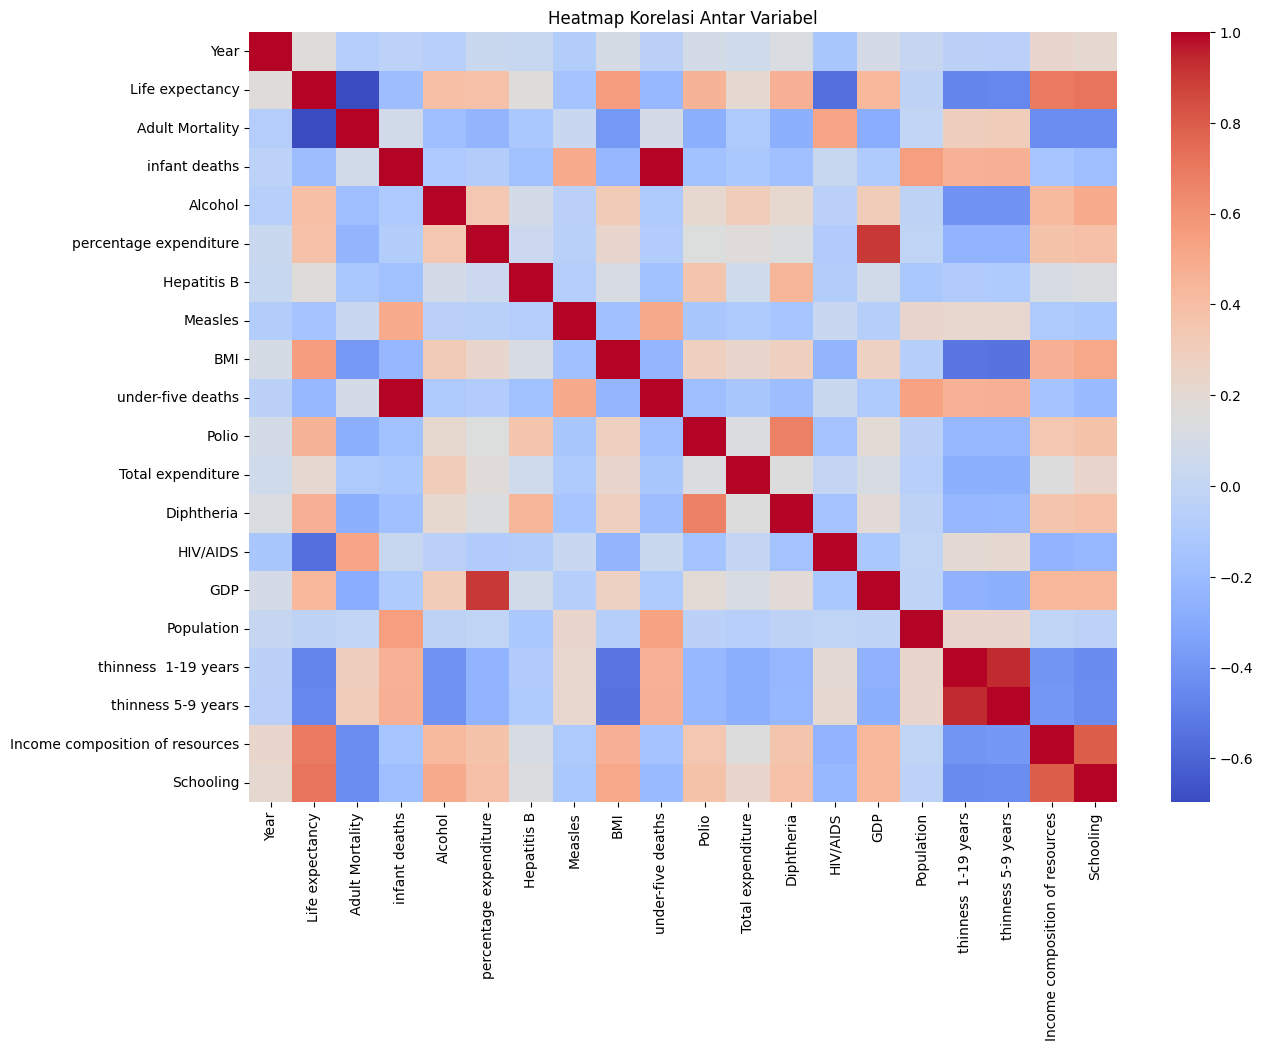

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

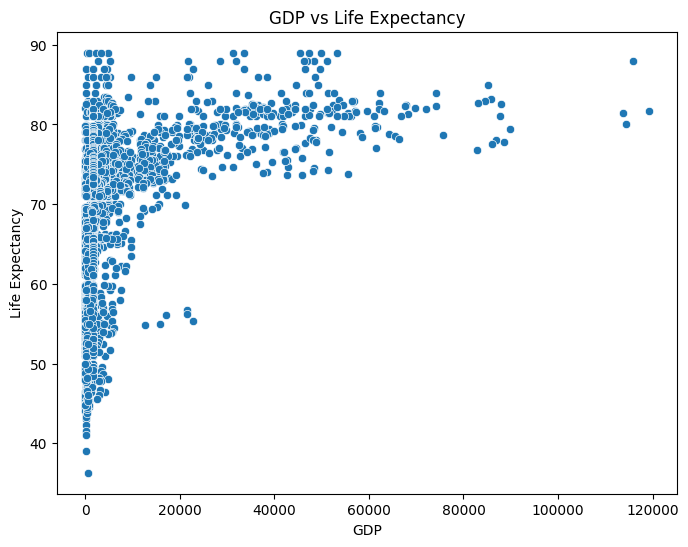

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP', y='Life expectancy', data=df)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

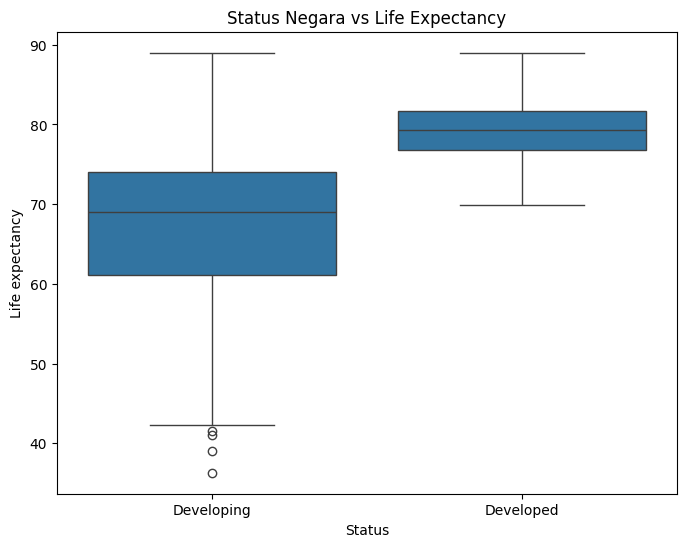

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.title('Status Negara vs Life Expectancy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Fitur dan target
X = df[['Schooling']]
y = df['Life expectancy']

# Split data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model dan latih
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Prediksi
y_pred = model_simple.predict(X_test)

# Evaluasi
print("🔹 Regresi Linier Sederhana")
print("R² Score       :", r2_score(y_test, y_pred))
print("MAE            :", mean_absolute_error(y_test, y_pred))
print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred)))


🔹 Regresi Linier Sederhana
R² Score       : 0.5517373918768889
MAE            : 4.639579605168194
RMSE           : 6.2269131747805915


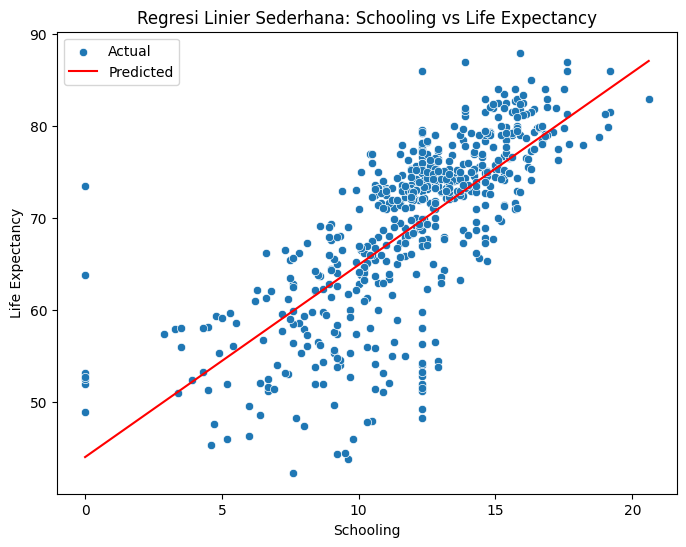

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Schooling'], y=y_test, label='Actual')
sns.lineplot(x=X_test['Schooling'], y=y_pred, color='red', label='Predicted')
plt.title('Regresi Linier Sederhana: Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [ ]:
# Fitur dan target
X_multi = df[['Schooling', 'Alcohol', 'BMI', 'GDP']]
y = df['Life expectancy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Model dan pelatihan
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Prediksi
y_pred_multi = model_multi.predict(X_test)

# Evaluasi
print("\n🔸 Regresi Linier Berganda")
print("R² Score       :", r2_score(y_test, y_pred_multi))
print("MAE            :", mean_absolute_error(y_test, y_pred_multi))
print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred_multi)))



🔸 Regresi Linier Berganda
R² Score       : 0.6122981884524459
MAE            : 4.377133002478757
RMSE           : 5.791025382286357


In [ ]:
# Simpan dataset bersih
df.to_csv('Life_Expectancy_Cleaned.csv', index=False)


In [ ]:
from google.colab import files
files.download('Life_Expectancy_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>